<a href="https://colab.research.google.com/github/manavgurnani21/data_augmentation_tld_research/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding Images to Drive Folder

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset
!unzip lisa-traffic-light-dataset.zip

In [ ]:
import os

# getting current directory
os.getcwd()

all_image_paths = []

## Getting Day Sequence Paths

In [ ]:
# getting all paths for content layer
content = os.listdir('/content/')
content.sort()
content = content[:-3]
content.remove('.config')
content.remove('kaggle.json')
content.remove('lisa-traffic-light-dataset.zip')
content.remove('Annotations')
content.remove('dayTrain')
content.remove('nightTrain')
for folder in content:
  if folder == '.ipynb_checkpoints':
    content.remove('.ipynb_checkpoints')
print(content)

['content', 'daySequence1', 'daySequence2', 'drive', 'nightSequence1', 'nightSequence2', 'sample-dayClip6', 'sample-nightClip1', 'sample_data']


In [ ]:
for folder in content:
  print('/content/' + folder + '/' + folder + '/frames/')
  list = os.listdir('/content/' + folder + '/' + folder + '/frames/')
  for path in list:
    all_image_paths.append('/content/' + folder + '/' + folder + '/frames/' + path)

/content/content/content/frames/


FileNotFoundError: ignored

## Getting Clip Paths

In [ ]:
train_paths = ['/content/dayTrain/dayTrain/', '/content/nightTrain/nightTrain/']
for path in train_paths:
  list1 = os.listdir(path)
  if '.DS_Store' in list1:
    list1.remove('.DS_Store')
  for name in list1:
    list2 = os.listdir(path + name + '/frames/')
    for item in list2:
      all_image_paths.append(path + name + '/frames/' + item)

# Adding All Annotations

## Getting all Sequence Annotations

In [ ]:
import os

all_annotation_paths = []

In [ ]:
root_path = '/content/Annotations/Annotations'
main = os.listdir(root_path)
main.remove('dayTrain')
main.remove('nightTrain')

for folder in main:
  list1 = os.listdir(root_path + '/' + folder)
  list1[0] = folder + list1[0]
  os.rename(root_path + folder + '/frameAnnotationsBOX.csv', root_path + folder + '/' + list1[0])
  all_annotation_paths.append(root_path + folder + '/' + list1[0])

## Getting all Clip Annotations

In [ ]:
clipPaths = [root_path + 'dayTrain/', root_path + 'nightTrain/']

for folder in clipPaths:
  list2 = os.listdir(folder)
  for name in list2:
    list3 = os.listdir(folder + name)
    list3[0] = name + list3[0]
    print(folder + name + '/' + list3[0])
    os.rename(folder + name + '/frameAnnotationsBOX.csv', folder + name + '/' + list3[0])
    all_annotation_paths.append(folder + name + '/' + list3[0])

# Sorting All Lists

In [ ]:
import numpy as np
image_paths = np.asarray(all_image_paths)
sorted_image_paths = np.sort(image_paths)
print(sorted_image_paths)

annotation_paths = np.asarray(all_annotation_paths)
sorted_annotation_paths = np.sort(annotation_paths)
print(sorted_annotation_paths)

# Cropping the Images

In [ ]:
def findIndexofElement(value, array):
  for i in range(len(array)):
    if array[i][array[i].rfind('/'):] == value:
      return i
      break

In [ ]:
os.mkdir('/content/allCroppedImages/')
os.mkdir('/content/allCroppedImages/stop/')
os.mkdir('/content/allCroppedImages/warning/')
os.mkdir('/content/allCroppedImages/go/')
os.mkdir('/content/allCroppedImages/warningLeft/')
os.mkdir('/content/allCroppedImages/goLeft/')
os.mkdir('/content/allCroppedImages/stopLeft/')
os.mkdir('/content/allCroppedImages/goForward/')

In [ ]:
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

def cropAllImages(path):
  df = pd.read_csv(path, sep=';')
  filenames = df['Filename']
  leftX = np.asarray(df['Upper left corner X'])
  rightX = np.asarray(df['Lower right corner X'])
  leftY = np.asarray(df['Upper left corner Y'])
  rightY = np.asarray(df['Lower right corner Y'])
  tag = np.asarray(df['Annotation tag'])

  image_saved_counter = 0

  # loc_index is the location of the image path in all sorted paths
  for i in range(len(filenames)):
    findIndexofElement(filenames[i][filenames[i].rfind('/'):], sorted_image_paths)
    img = img_to_array(load_img(sorted_image_paths[findIndexofElement(filenames[i][filenames[i].rfind('/'):], sorted_image_paths)]))
    crop_img = array_to_img(img[leftY[i]:rightY[i], leftX[i]:rightX[i]])
    # inputting them in folder
    crop_img.save('/content/allCroppedImages/' + tag[i] + filenames[i][filenames[i].rfind('/'):])
    image_saved_counter+=1
    if(image_saved_counter%1000==0):
      print(image_saved_counter)

# for path in all_annotation_paths:
#   cropAllImages(path)

In [ ]:
# from google.colab import files
# !zip -r '/content/"allCroppedImages.zip"' '/content/allCroppedImages'
# files.download('/content/allCroppedImages.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Randomly Assigning Files

- after putting into sub-folders
- for each subfolder:
  - put all names in a list
  - shuffle
  - get all three indices
  - put into train, test, val

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/cropped_images_randomized/cropped_images_randomized.zip' -d '/content/'

In [ ]:
# import os

# os.mkdir('/content/train/')
# os.mkdir('/content/test/')
# os.mkdir('/content/val/')

# folderList = ['train', 'test', 'val']
# for name in folderList:
#   os.mkdir('/content/' + name + '/stop/')
#   os.mkdir('/content/' + name + '/go/')
#   os.mkdir('/content/' + name + '/warning/')
#   os.mkdir('/content/' + name + '/warningLeft/')
#   os.mkdir('/content/' + name + '/goLeft/')
#   os.mkdir('/content/' + name + '/stopLeft/')
#   os.mkdir('/content/' + name + '/goForward/')

In [ ]:
# import random

# def listPaths(path):
#   pathList = []
#   for folder in os.listdir(path):
#     if folder == '.ipynb_checkpoints':
#       continue
#     pathList.append(path + folder + '/')
#     random.shuffle(pathList)
#   return pathList

# print(listPaths('/content/content/allCroppedImages/'))

In [ ]:
# import random
# import shutil
# import pandas as pd
# import numpy as np

# def shuffleSelection(path):
#   allFolders = listPaths(path)
#   for folder in allFolders:
#     df = pd.DataFrame(listPaths(folder))
#     trainPaths, testPaths, valPaths = np.split(df, [int(.8 * len(df)), int(.9 * len(df))])
#     moveToFolder(trainPaths, testPaths, valPaths)

# def moveToFolder(trainPaths, testPaths, valPaths):
#   finalTrainPathList = np.asarray(trainPaths[0])
#   type(finalTrainPathList)
#   finalTestPathList = np.asarray(testPaths[0])
#   finalValPathList = np.asarray(valPaths[0])
#   for path in finalTrainPathList:
#     shutil.move(path[:-1], '/content/train' + path[33:-1])
#   for path in finalTestPathList:
#     shutil.move(path[:-1], '/content/test' + path[33:-1])
#   for path in finalValPathList:
#     shutil.move(path[:-1], '/content/val' + path[33:-1])

In [ ]:
# shuffleSelection('/content/content/allCroppedImages/')

In [ ]:
# from google.colab import files
# !zip -r '/content/cropped_images_randomized.zip' '/content/cropped_images_randomized'
# files.download('/content/cropped_images_randomized.zip')

In [ ]:
# import os, shutil
# folder = '/content/cropped_images_randomized/'
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))

# Training Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

train_data_dir = '/Users/manavgurnani21/Downloads/cropped_images_randomized/content/cropped_images_randomized/train'
test_data_dir = '/Users/manavgurnani21/Downloads/cropped_images_randomized/content/cropped_images_randomized/test'
val_data_dir = '/Users/manavgurnani21/Downloads/cropped_images_randomized/content/cropped_images_randomized/val'
 
img_height = 180
img_width = 180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40757 files belonging to 7 classes.
Found 5096 files belonging to 7 classes.
Found 5098 files belonging to 7 classes.


In [2]:
class_names = train_ds.class_names
print(class_names)

['go', 'goForward', 'goLeft', 'stop', 'stopLeft', 'warning', 'warningLeft']


In [3]:
normalization_layer = layers.Rescaling(1./255)

In [4]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


2022-10-30 00:49:55.406199: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=7,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 7)                3591      
 pper)                                                           
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
____________________________________

In [7]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Epoch 1/7


/Users/manavgurnani21/anaconda3/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1274/1274 [==============================] - 1001s 785ms/step - loss: 0.1319 - accuracy: 0.9554 - val_loss: 0.0718 - val_accuracy: 0.9733
Epoch 2/7
1274/1274 [==============================] - 1002s 787ms/step - loss: 0.0641 - accuracy: 0.9768 - val_loss: 0.0562 - val_accuracy: 0.9798
Epoch 3/7
1274/1274 [==============================] - 995s 781ms/step - loss: 0.0461 - accuracy: 0.9823 - val_loss: 0.0509 - val_accuracy: 0.9827
Epoch 4/7
1274/1274 [==============================] - 983s 771ms/step - loss: 0.0398 - accuracy: 0.9850 - val_loss: 0.0957 - val_accuracy: 0.9704
Epoch 5/7
1274/1274 [==============================] - 978s 768ms/step - loss: 0.0329 - accuracy: 0.9879 - val_loss: 0.1080 - val_accuracy: 0.9694
Epoch 6/7
1274/1274 [==============================] - 998s 784ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.0848 - val_accuracy: 0.9749
Epoch 7/7
1274/1274 [==============================] - 1010s 793ms/step - loss: 0.0278 - accuracy: 0.9898 - val_loss: 0.0646 -

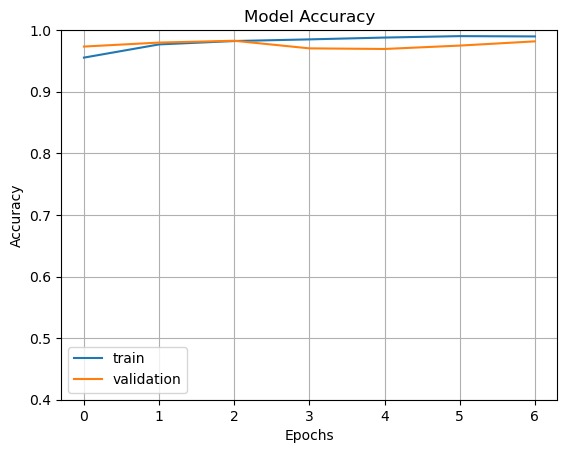

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

resnet_history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7
)

fig1 = plt.gcf()
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [10]:
pred=resnet_model.predict(test_ds)
print(pred)

160/160 [==============================] - 250s 2s/step
[[9.99378681e-01 9.54978350e-06 6.10013376e-04 ... 3.45236998e-07
  3.33583813e-07 2.65724964e-07]
 [9.99148846e-01 1.45328011e-06 8.48557102e-04 ... 5.89816551e-09
  4.93128027e-07 5.50772370e-07]
 [9.99795258e-01 1.97631863e-07 2.03029980e-04 ... 2.00553329e-09
  4.08059151e-07 9.92702667e-07]
 ...
 [2.02011124e-05 1.05528049e-08 5.22344195e-08 ... 8.32501996e-07
  1.09637476e-04 5.95400888e-06]
 [6.85162961e-01 1.15269260e-03 3.13556910e-01 ... 1.52670239e-07
  3.37867241e-05 9.05590496e-05]
 [2.97327688e-06 2.75932237e-08 6.09514132e-07 ... 1.32695612e-04
  6.99936936e-06 9.84368489e-06]]


## Agenda for 10/18

- sort out issue with random shuffle function (ask about cropping time)
- find way to convert images to dataset
  - ask why we need singular class folders

Goals for the next two weeks:
- run experiments (and caputre results)
- finish research paper